In [1]:
import sys 
#sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append("../..") # add standard 's modules
# sys.path.append('/home/hbkoziel/pyfesom/codes/modules')
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')

import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time
import pandas as pd
import xarray as xr

sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
import cmocean as cmap

No joblib
no cmocean


In [2]:
# Loading mesh for run

mesh_id    = 'meshArc4.5'
runid	= 'Arc12'
meshpath   = '/scratch/usr/hbkoziel/mesh/'+mesh_id+'/'            # Defining path where mesh is stored
mesh = pf.load_mesh(meshpath, usepickle=True, get3d=False)        # Loading mesh, stores it in mesh.****  
#mesh = pf.fesom_mesh(meshpath, get3d=True)
#mesh.zlevs = -mesh.zlevs                                            # Depth is made negative
input_directory  = '/scratch/usr/hbkoziel/'+runid+'/netcdf_monthly/'

first_year = 2014
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)

months =np.linspace(0,11,12).astype(int)

/scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh


In [3]:
# LOAD BATHY AND FLUXES #

ncfile       = '/scratch/usr/hbkoziel/bathy/ETOPO2v2c_f4.nc'
f           = Dataset(ncfile, 'r')
bathy    = f.variables['z'][:,:]
lonbathy    = f.variables['x'][:]
latbathy    = f.variables['y'][:]
Xbat, Ybat = np.meshgrid(lonbathy,latbathy)

In [4]:
ncfile      = meshpath+'Arc4.5.initial.mesh.diag.nc'
f           = Dataset(ncfile, 'r')
NodalArea = f.variables['cluster_area'][:]
f.close()

In [15]:
# V1 -> d(u.N)
# mesoscale local horizontal effect

tracername = 'HADV'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
hadv    = f1.variables['ADVH'][:,:].mean(axis=0)*30
#hadv = hadv * 30
print np.nanmax(hadv)
print np.nanmin(hadv)
print np.nanmean(hadv)

# mesoscale local vertical effect

tracername = 'VADV'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
vadv    = f1.variables['VADV'][:,:].mean(axis=0)*30
#vadv = vadv * 30# * 24 *3600
print np.nanmax(vadv)
print np.nanmin(vadv)
print np.nanmean(vadv)

0.01573443
-0.019362466
1.4551135e-06
172.30186
-234.97592
-0.091022685


In [16]:
# V2 -> u.d(N) -> MEAN
# remote horizontal effect

tracername = 'HADVv2'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
hadv2    = f1.variables['ADVH'][:,:].mean(axis=0)*30
hadv_march    = f1.variables['ADVH'][3,:]*30
#hadv2 = hadv2 * 30
print np.nanmax(hadv2)
print np.nanmin(hadv2)
print np.nanmean(hadv2)

# remote vertical effect

tracername = 'VADVv2'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
vadv2    = f1.variables['VADV'][:,:].mean(axis=0)*30
#vadv2 = vadv2 * 30# * 24 *3600
print np.nanmax(vadv2)
print np.nanmin(vadv2)
print np.nanmean(vadv2)

2333.6885
-6866.0005
-0.018898953
43.487175
-58.325775
-0.04215178


In [7]:
# V1 -> d(u'.N') -> EDDY
# submesoscale local effect

tracername = 'HEDY'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
hedyv1    = f1.variables['HEDY'][:].mean(axis=0)*30
#hedyv1 = hedyv1 * 30# * 3600 * 30
print np.nanmax(hedyv1)
print np.nanmin(hedyv1)
print np.nanmean(hedyv1)

tracername = 'VEDY'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
vedyv1    = f1.variables['VEDY'][:].mean(axis=0)*30
#vedyv1 = vedyv1 * 30# * 3600 * 30
print np.nanmax(vedyv1)
print np.nanmin(vedyv1)
print np.nanmean(vedyv1)

1.525938e-08
-1.6626347e-08
2.1603861e-13
70.915146
-268.29407
0.13674751


In [8]:
# V2 -> u' . d(N') -> EDDY
# eddy advection

tracername = 'HEDYv2'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
hedyv2    = f1.variables['HEDY'][:].mean(axis=0)*30
#hedyv2 = hedy * 30# * 3600 * 30
print np.nanmax(hedyv2)
print np.nanmin(hedyv2)
print np.nanmean(hedyv2)

tracername = 'VEDYv2'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
vedyv2    = f1.variables['VEDY'][:].mean(axis=0)*30
#vedyv2 = vedyv2 * 30# * 3600 * 30
print np.nanmax(vedyv2)
print np.nanmin(vedyv2)
print np.nanmean(vedyv2)

0.0014636838
-0.0010832883
1.7465903e-08
138.37253
-334.30313
0.067661054


In [9]:
tracername = 'BFACT'
ncfile       = input_directory+tracername+'.1995.monthly.nc'
f1           = Dataset(ncfile, 'r')
bfact_mean    = f1.variables['BFACT'][:,:].mean(axis=0) + f1.variables['BFACT'][:2,:].mean(axis=0)
bfact_max    = f1.variables['BFACT'][:,:].max(axis=0)
bfact_min    = f1.variables['BFACT'][:,:].min(axis=0)
bfact_std    = f1.variables['BFACT'][:,:].std(axis=0)
bfact_diff    = np.diff(f1.variables['BFACT'][:,:],axis=0)
bfact_int = np.sum(bfact_diff, axis=0) + np.sum(bfact_diff[:2,:], axis=0)
print np.shape(bfact_mean)
print np.nanmax(bfact_mean)
print np.nanmin(bfact_mean)

(753179,)
1044794700000.0
-34.916916


In [10]:
tracername = 'rv100m'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
rv    = f1.variables['rv100m'][10,:]#.mean(axis=0)
#bfact = bfact * 365 * 100
#print np.shape(bfact)

In [11]:
ind_all = np.load('index_all.npy')

/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less_equal
  # Remove the CWD from sys.path while we load stuff.
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater_equal
  # This is added back by InteractiveShellApp.init_path()


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:104: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:126: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:127: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


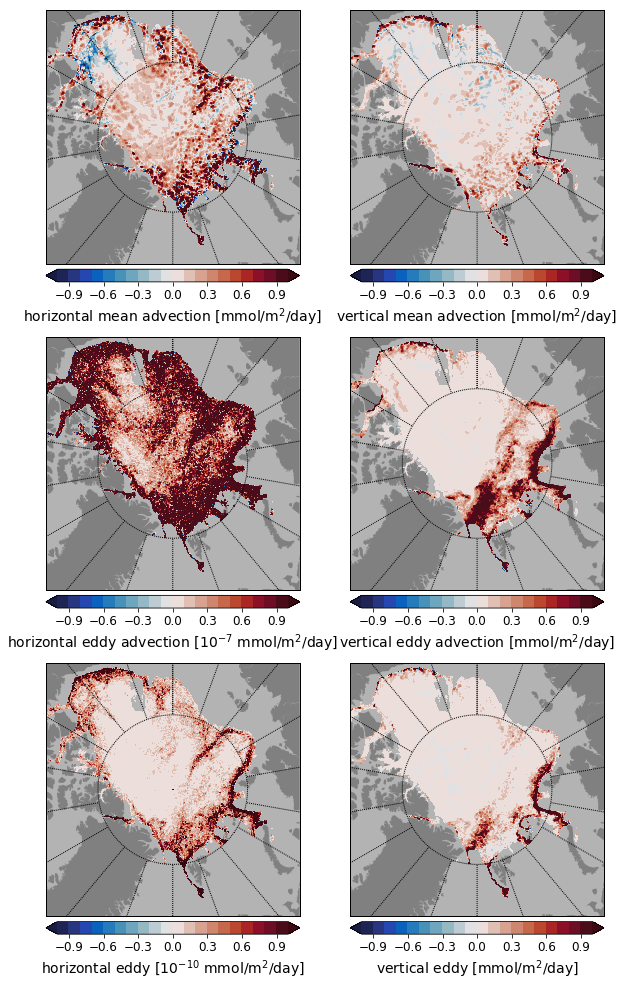

In [12]:
fig = plt.figure(figsize=(10, 17), facecolor='w', edgecolor='k')
contours = np.arange(-1, 1.1, .1)

ax1      = fig.add_subplot(321)
#hadv[ind_all] = np.nan
data = np.empty(np.shape(hadv2))
data[:] = np.nan
data[ind_all]=hadv2[ind_all]
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(data,mesh,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'horizontal mean advection [mmol/m$^{2}$/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

ax2      = fig.add_subplot(322)
data = np.empty(np.shape(vadv2))
data[:] = np.nan
data[ind_all]=vadv2[ind_all]
#vadv[mesh.topo < 100] = np.nan
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(data,mesh,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'vertical mean advection [mmol/m$^{2}$/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

ax3      = fig.add_subplot(323)
#hadv[ind_all] = np.nan
data = np.empty(np.shape(hedyv2))
data[:] = np.nan
data[ind_all]=hedyv2[ind_all]*10**7
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(data,mesh,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'horizontal eddy advection [10$^{-7}$ mmol/m$^{2}$/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

ax4      = fig.add_subplot(324)
data = np.empty(np.shape(vedyv2))
data[:] = np.nan
data[ind_all]=vedyv2[ind_all]
#vadv[mesh.topo < 100] = np.nan
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(data,mesh,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'vertical eddy advection [mmol/m$^{2}$/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)


ax5      = fig.add_subplot(325)
data = np.empty(np.shape(hedyv1))
data[:] = np.nan
data[ind_all]=hedyv1[ind_all]
#hedy[mesh.topo < 300] = np.nan
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(data*10**10,mesh,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'horizontal eddy [10$^{-10}$ mmol/m$^{2}$/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

ax6      = fig.add_subplot(326)
data = np.empty(np.shape(vedyv1))
data[:] = np.nan
data[ind_all]=vedyv1[ind_all]
#vedy[mesh.topo < 300] = np.nan
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(data,mesh,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'vertical eddy [mmol/m$^{2}$/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less_equal
  # Remove the CWD from sys.path while we load stuff.
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater_equal
  # This is added back by InteractiveShellApp.init_path()


For depth 0 model level -0.0 will be used


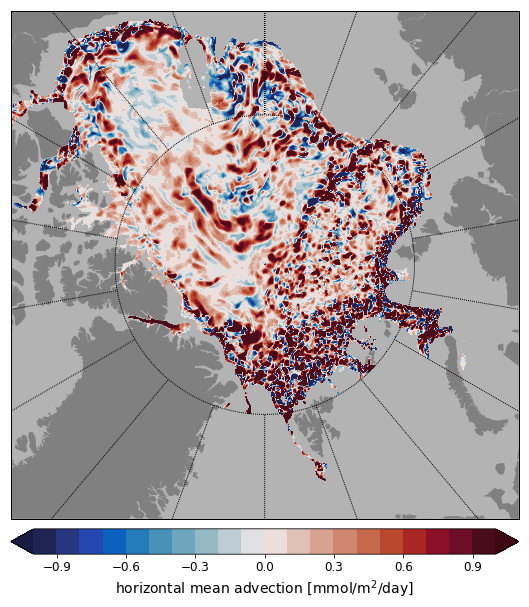

In [17]:
fig = plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
contours = np.arange(-1, 1.1, .1)

ax1      = fig.add_subplot(111)
#hadv[ind_all] = np.nan
data = np.empty(np.shape(hadv2))
data[:] = np.nan
data[ind_all]=hadv_march[ind_all]
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(data,mesh,0)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'horizontal mean advection [mmol/m$^{2}$/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

For depth 0 model level -0.0 will be used


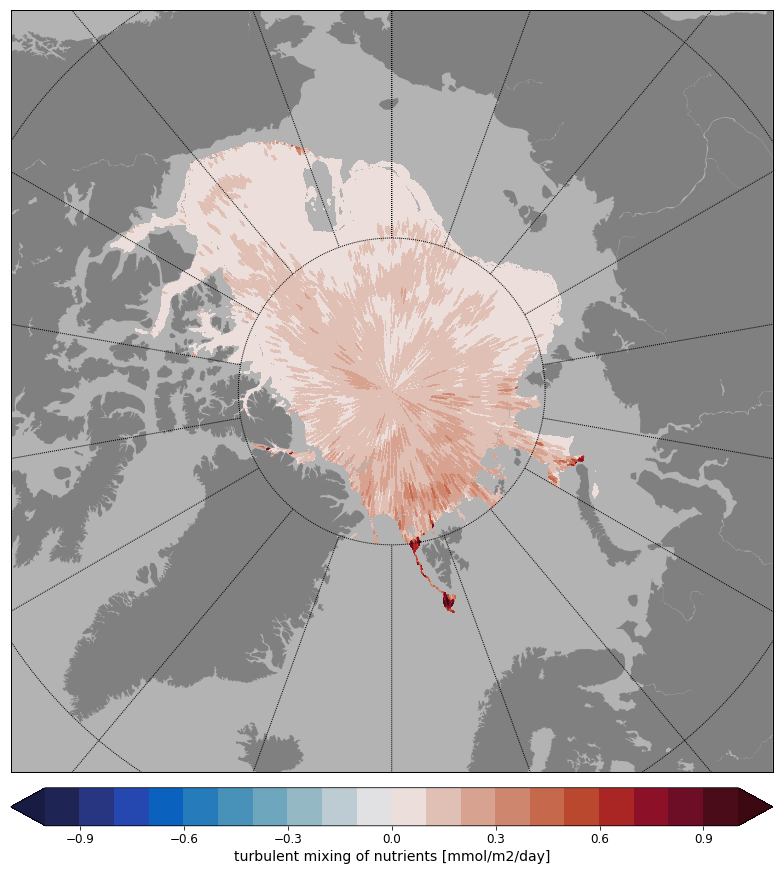

In [13]:
vmix = np.load('VMIX2014_Arc12_yearly.npy')
data = np.empty(np.shape(vmix))
data[:] = np.nan
data[ind_all]=vmix[ind_all]

fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')
contours = np.arange(-1, 1.1, .1)

data, elem_no_nan = pf.get_data(data,mesh,0)
ax1      = fig.add_subplot(111)
m = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'turbulent mixing of nutrients [mmol/m2/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
#plt.title('Nutrient limitation', fontsize=16)

/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less_equal
  # This is added back by InteractiveShellApp.init_path()
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater_equal
  if sys.path[0] == '':


For depth 0 model level -0.0 will be used


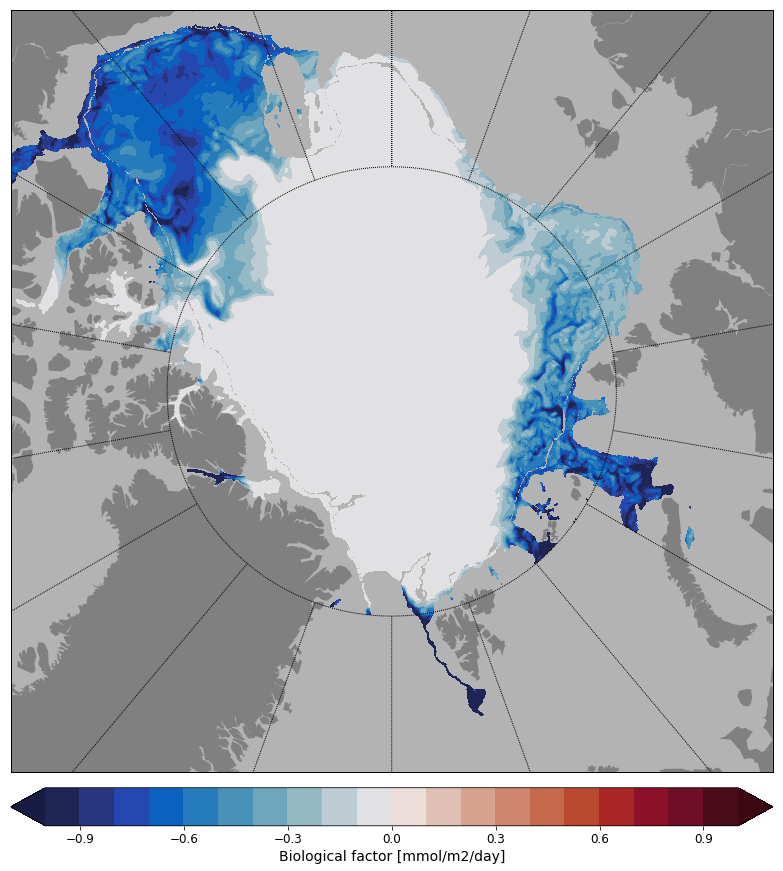

In [14]:
fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')

contours = np.arange(-1, 1.1, .1)
#contours = np.arange(-4, 4.1, .1)
#contours = np.arange(-15, 16, 1)
#contours = np.arange(-150, 150, 10)
data = np.empty(np.shape(bfact_int))
data[:] = np.nan
data[ind_all]=-bfact_std[ind_all]
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(data,mesh,0)
ax1      = fig.add_subplot(111)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'Biological factor [mmol/m2/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
#plt.title('Nutrient limitation', fontsize=16)

For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less_equal
  
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater_equal
  from ipykernel import kernelapp as app


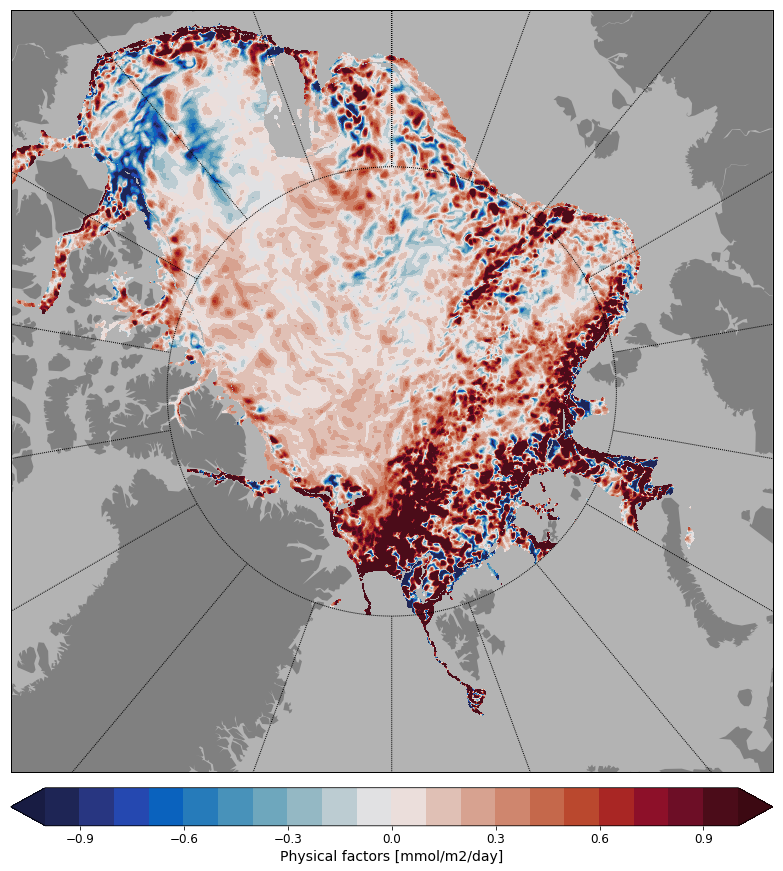

In [25]:
#phy = -vadv2# - hadv2# - vedyv1 - hedyv1
phy = vadv2 + hadv2  + vedyv2 + hedyv2 #+ vedyv1 + hedyv1
#phy = - phy

fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')
contours = np.arange(-1, 1.1, .1)

data = np.empty(np.shape(phy))
data[:] = np.nan
data[ind_all]=phy[ind_all]
#bfact[bfact == 0] = np.nan
data, elem_no_nan = pf.get_data(data,mesh,0)
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps

ax1      = fig.add_subplot(111)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'Physical factors [mmol/m2/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
#plt.title('Nutrient limitation', fontsize=16)

In [16]:
# vmix = np.load('VMIX2014_Arc12_yearly.npy')
# #contours = np.arange(-150, 150, 10)
# #contours = np.arange(-15, 16, 1)

# fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')

# data, elem_no_nan = pf.get_data(vmix,mesh,0)
# ax1      = fig.add_subplot(111)
# m = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
# x, y = m(mesh.x2, mesh.y2)
# plabels=[False,False,False,False]
# mlabels=[False,False,False,False]
# m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
# m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
# m.drawmapboundary(fill_color='0.7')
# m.fillcontinents(color='.5',lake_color='.7')
# im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
# label = 'vertical turbulent mixing of nutrients [mmol/m2/year]'
# cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
# cbar.set_label(label, fontsize=14)
# cbar.ax.tick_params(labelsize=12)
# #plt.title('Nutrient limitation', fontsize=16)

For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less_equal
  del sys.path[0]
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater_equal
  


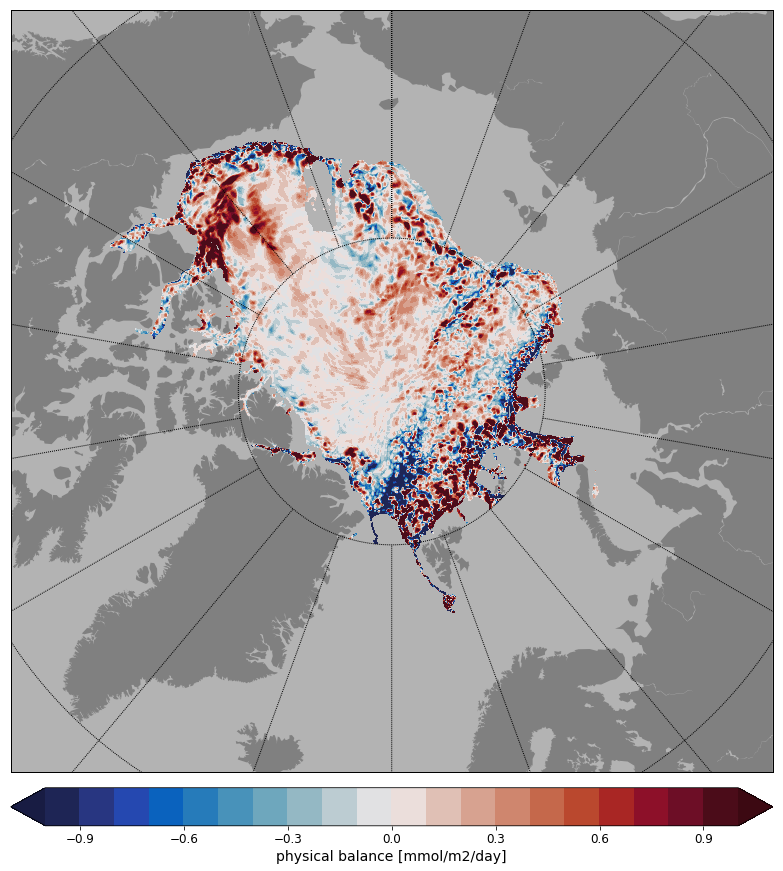

In [17]:
diff =  vmix - phy # - bfact_int*30 +
#contours = np.arange(-150, 150, 10)
#contours = np.arange(-15, 16, 1)
contours = np.arange(-1, 1.1, .1)

fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')

data = np.empty(np.shape(diff))
data[:] = np.nan
data[ind_all]=diff[ind_all]
data, elem_no_nan = pf.get_data(data,mesh,0)
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps

ax1      = fig.add_subplot(111)
m = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'physical balance [mmol/m2/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
#plt.title('Nutrient limitation', fontsize=16)

For depth 0 model level -0.0 will be used
-0.021256510855319915


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less_equal
  
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater_equal
  from ipykernel import kernelapp as app


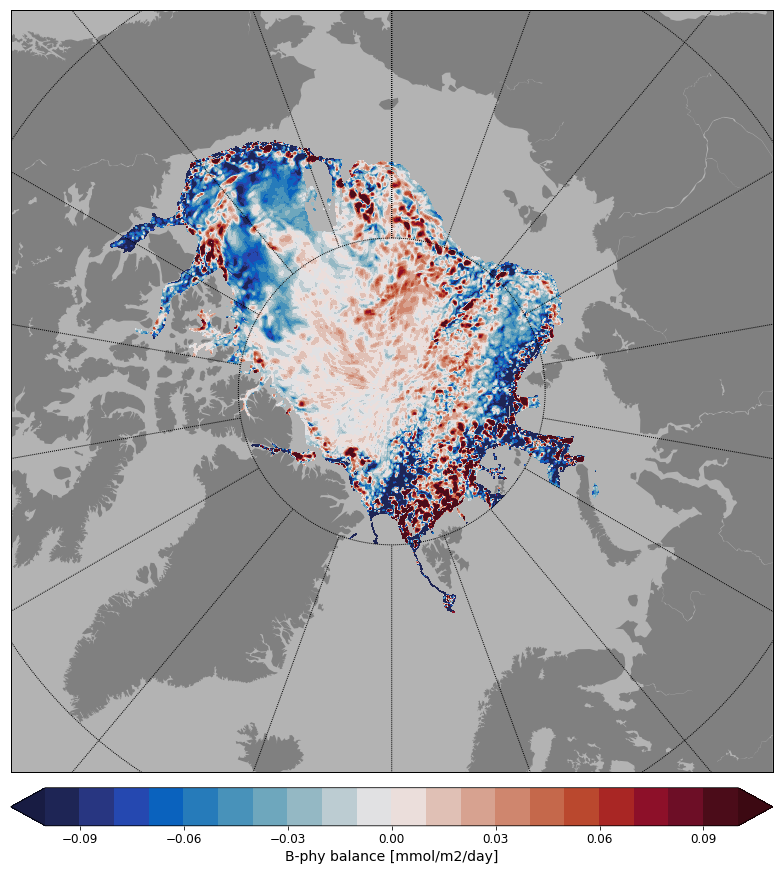

In [18]:
diff =  -bfact_std + vmix - phy # - bfact_int*30 +

#contours = np.arange(-150, 150, 10)
#contours = np.arange(-15, 16, 1)
contours = np.arange(-.1, .11, .01)

fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')

data = np.empty(np.shape(diff))
data[:] = np.nan
data[ind_all]=diff[ind_all]/10
data, elem_no_nan = pf.get_data(data,mesh,0)
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
print np.nanmean(data)
ax1      = fig.add_subplot(111)
m = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'B-phy balance [mmol/m2/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
#plt.title('Nutrient limitation', fontsize=16)

/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less_equal
  
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater_equal
  from ipykernel import kernelapp as app


For depth 0 model level -0.0 will be used


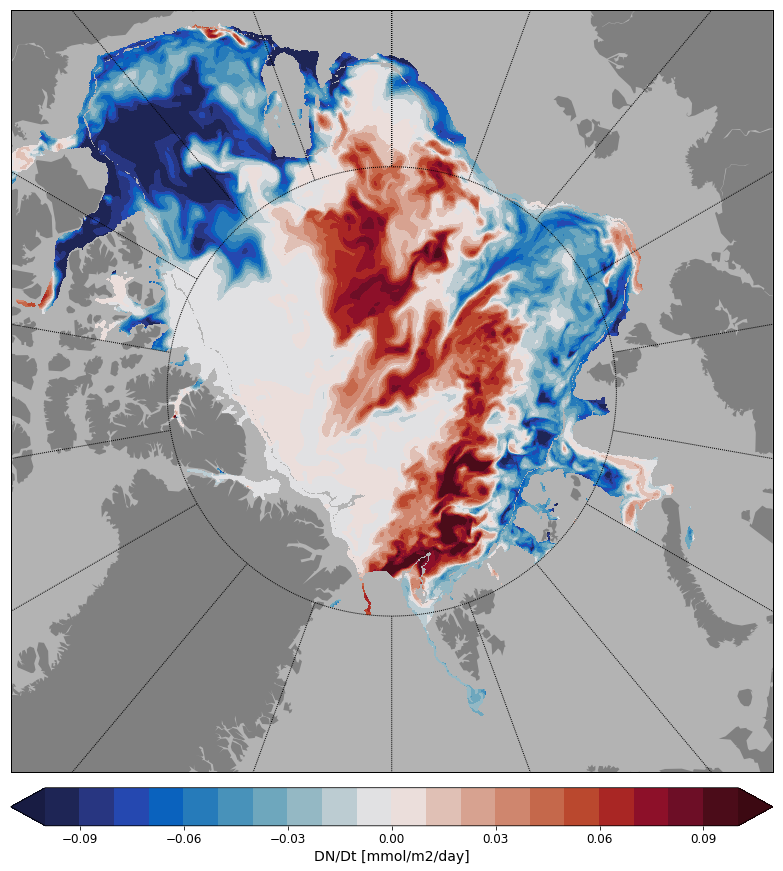

In [19]:
fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')

contours = np.arange(-.1, .11, .01)
#contours = np.arange(-.2, .21, .01)
#contours = np.arange(-1, 1.1, .1)
#contours = np.arange(-4, 4.1, .1)
#contours = np.arange(-15, 16, 1)
#contours = np.arange(-150, 150, 10)
b = bfact_int
data = np.empty(np.shape(b))
data[:] = np.nan
data[ind_all]=-b[ind_all]
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(data,mesh,0)
ax1      = fig.add_subplot(111)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'DN/Dt [mmol/m2/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
#plt.title('Nutrient limitation', fontsize=16)

In [20]:
# fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')

# rv[rv == 0] = np.nan
# data, elem_no_nan = pf.get_data(rv,mesh,0)
# eps=(contours.max()-contours.min())/100.
# data[data<=contours.min()]=contours.min()+eps
# data[data>=contours.max()]=contours.max()-eps

# ax1      = fig.add_subplot(111)
# contours = np.arange(-.1, .1, .001)
# m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
# x, y = m(mesh.x2, mesh.y2)
# plabels=[False,False,False,False]
# mlabels=[False,False,False,False]    
# m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
# m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
# m.drawmapboundary(fill_color='0.7')
# m.fillcontinents(color='.5',lake_color='.7')
# im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
# label = 'relative vorticity normalyzed by f'
# cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
# cbar.set_label(label, fontsize=14)
# cbar.ax.tick_params(labelsize=12)
# #plt.title('Nutrient limitation', fontsize=16)

In [21]:
runid	= 'Arc12'
input_directory  = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/' # Where the netcdf is saved
ncfile1       = input_directory+runid+'.2014.bio.mean.nc'
f1           = Dataset(ncfile1, 'r')
assim    = f1.variables['diags_bio5_mean'][:,:].mean(axis =0) + f1.variables['diags_bio6_mean'][:,:].mean(axis =0)

/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less_equal
  del sys.path[0]
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater_equal
  


For depth 0 model level -0.0 will be used


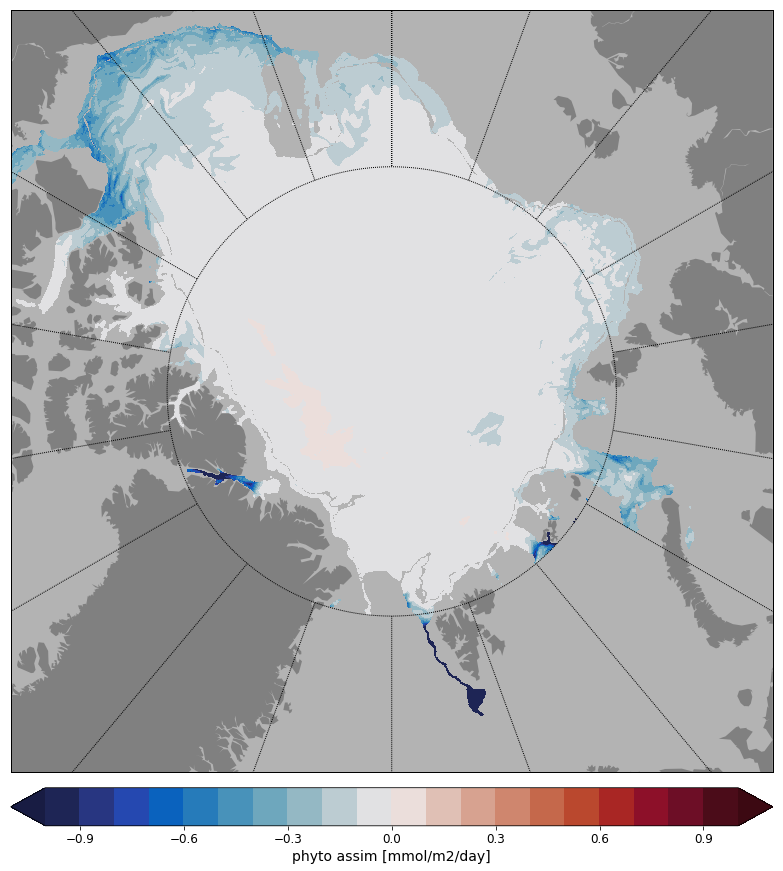

In [22]:
fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')

#contours = np.arange(-.2, .21, .01)
contours = np.arange(-1, 1.1, .1)
#contours = np.arange(-4, 4.1, .1)
#contours = np.arange(-15, 16, 1)
#contours = np.arange(-150, 150, 10)
b = assim
data = np.empty(np.shape(b))
data[:] = np.nan
data[ind_all]=-b[ind_all]
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(data,mesh,0)
ax1      = fig.add_subplot(111)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'phyto assim [mmol/m2/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
#plt.title('Nutrient limitation', fontsize=16)

In [23]:
ncfile2       = input_directory+runid+'.2014.oce.mean.nc'
f2           = Dataset(ncfile2, 'r')
t    = f2.variables['temp'][:,:].mean(axis =0)
don    = f2.variables['tr11'][:,:].mean(axis =0)
arrhenius = np.exp(-4500 *((1/(t+273.15)) - (1/288.15)))
rho_n = 0.11
remin = don * arrhenius * rho_n

/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less_equal
  del sys.path[0]
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater_equal
  


For depth 0 model level -0.0 will be used


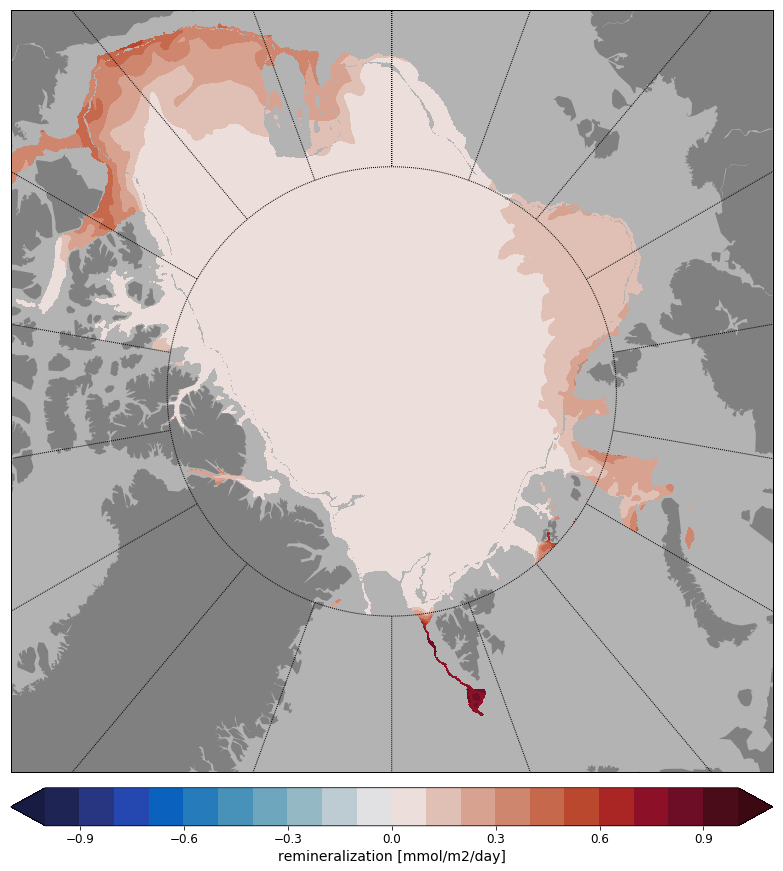

In [24]:
fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')

#contours = np.arange(-.2, .21, .01)
contours = np.arange(-1, 1.1, .1)
#contours = np.arange(-4, 4.1, .1)
#contours = np.arange(-15, 16, 1)
#contours = np.arange(-150, 150, 10)
b = remin *30
data = np.empty(np.shape(b))
data[:] = np.nan
data[ind_all]=b[ind_all]
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
data, elem_no_nan = pf.get_data(data,mesh,0)
ax1      = fig.add_subplot(111)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'remineralization [mmol/m2/day]'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
#plt.title('Nutrient limitation', fontsize=16)